# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

In [2]:
import pandas as pd
import numpy as pd
import matplotlib as plot
import seaborn as sns
import plotly.express as px
import random as random

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [6]:
# card class

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

In [8]:
## deck class

class Deck:
    def __init__(self, num_sets=6): ## 6 decks is standard
        self.cards = [Card(s, r) for s in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for r in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace'] for _ in range(num_sets)]
        self.shuffle()
        self.plastic_index = random.randint(20, 30)

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

    def replace_plastic_card(self):
        self.cards.insert(self.plastic_index, self.draw())

    def __repr__(self):
        return f"Deck with {len(self.cards)} cards"

In [10]:
deck = Deck(num_sets=2)
print(deck)

hand_size = 3
hand = [deck.draw() for i in range(hand_size)]
print("Hand:", hand)

print(deck)

Deck with 104 cards
Hand: [Ace of Clubs, 8 of Diamonds, 7 of Spades]
Deck with 101 cards


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [ ]:
## PDF is in git along with my submission :)

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [12]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"  # Return a string representation of the card

class Deck:
    def __init__(self, num_sets=6):
        self.num_sets = num_sets  # num of card sets in the deck
        self.cards = []  # empty ist
        self.plastic_index = None  # index of the plastic card

    def shuffle(self):
        pass

    def draw(self):
        pass

    def replace_plastic_card(self):
        pass

    def __repr__(self):
        pass

class Player:
    def __init__(self, name, chips=100):
        self.name, self.chips, self.hand = name, chips, []

    def bet(self):
        pass

    def win(self, amount):
        pass

    def lose(self, amount):
        pass

class CountingPlayer(Player):
    def __init__(self, name, threshold):
        super().__init__(name)  # calls the parent class constructor
        self.threshold, self.count = threshold, 0
    def update_count(self, card):
        pass

    def decide(self):
        pass

class Dealer(Player):
    def decide(self):
        pass  #hit or stay

def simulate_round(players, deck):
    pass

def simulate_game():
    pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [14]:
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class HumanPlayer(Player): pass

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [16]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, n =1):
        self.cards = [Card(s, r) for s in 'Hearts Diamonds Clubs Spades'.split() for r in '2 3 4 5 6 7 8 9 10 Jack Queen King Ace'.split() for _ in range(n)]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class Game:
    def __init__(self, n):
        self.deck = Deck()
        self.players = [Dealer() for _ in range(n)] + [Player("Human")]

    def deal(self):
        for _ in range(2):
            for p in self.players:
                p.hand.append(self.deck.draw())

    def play_round(self):
        self.deal()
        for p in self.players:
            print(f"{p.name}'s hand:", p.hand)

In [18]:
game_1 = Game(5)

for i in range(1,5):
    print(f"Round {i}:")
    game_1.play_round()
    print()

Round 1:
Dealer's hand: [6 of Diamonds, 9 of Hearts]
Dealer's hand: [5 of Diamonds, Queen of Diamonds]
Dealer's hand: [7 of Hearts, King of Hearts]
Dealer's hand: [King of Spades, 10 of Diamonds]
Dealer's hand: [2 of Clubs, 7 of Diamonds]
Human's hand: [Ace of Diamonds, 5 of Spades]

Round 2:
Dealer's hand: [6 of Diamonds, 9 of Hearts, Jack of Spades, 10 of Clubs]
Dealer's hand: [5 of Diamonds, Queen of Diamonds, 6 of Hearts, Jack of Diamonds]
Dealer's hand: [7 of Hearts, King of Hearts, 2 of Hearts, 9 of Diamonds]
Dealer's hand: [King of Spades, 10 of Diamonds, Ace of Spades, 9 of Clubs]
Dealer's hand: [2 of Clubs, 7 of Diamonds, King of Clubs, 3 of Hearts]
Human's hand: [Ace of Diamonds, 5 of Spades, 8 of Hearts, 8 of Diamonds]

Round 3:
Dealer's hand: [6 of Diamonds, 9 of Hearts, Jack of Spades, 10 of Clubs, 5 of Hearts, 6 of Spades]
Dealer's hand: [5 of Diamonds, Queen of Diamonds, 6 of Hearts, Jack of Diamonds, 9 of Spades, 4 of Hearts]
Dealer's hand: [7 of Hearts, King of Hearts,

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [20]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count < self.threshold else "Stay"

player =  CardCounter("Counting Player")
cards = [Card('Hearts', '2'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for card in cards:
    player.update_count(card)

print("Decision:", player.decide())

Decision: Stay


In [22]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count < self.threshold else "Stay"

In [24]:
player = CardCounter("Counting Player")
cards = [Card('Hearts', '1'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for i in cards:
    player.update_count(i)

print("Decision:", player.decide())

Decision: Stay


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [28]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):


        if str(self.rank) in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif str(self.rank) in ('7', '8', '9'):
            return 0
        else:  # 10, J, Q, K
            return -1

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count < self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    if len(deck) < (len(players) * 2 + 1):
        return
        
    for player in players: ## Assign hands
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop()) ##additional hand

    for player in players[1:]:
        while isinstance(player, CardCounter) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())
            
    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())
        
    dealer_value = sum(card.card_value() for card in dealer.hand)
    
    for player in players[1:]: ## No dealer
        if isinstance(player, CardCounter):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:  # 10, J, Q, K
                player.win(player.bet())

In [30]:
def simulate_game():
    
    dealer = Dealer("Dealer")
    strategy_player = CardCounter("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)] *6
    random.shuffle(deck)

    rounds = 0

    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)
        
    return strategy_player.chips - 100

winnings = simulate_game()
print("Strategy Player's Winnings:", winnings) 

Strategy Player's Winnings: 1


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [35]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        if str(self.rank) in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif str(self.rank) in ('7', '8', '9'):
            return 0
        else:  # 10, J, Q, K
            return -1

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count < self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    if len(deck) < (len(players) * 2 + 1):
        return

    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())
    
    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:  # 10, J, Q, K
                player.win(player.bet())

def simulate_game():
    dealer = Dealer("Dealer")
    strategy_player = CardCounter("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    rounds = 0
    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)

    return strategy_player.chips - 100

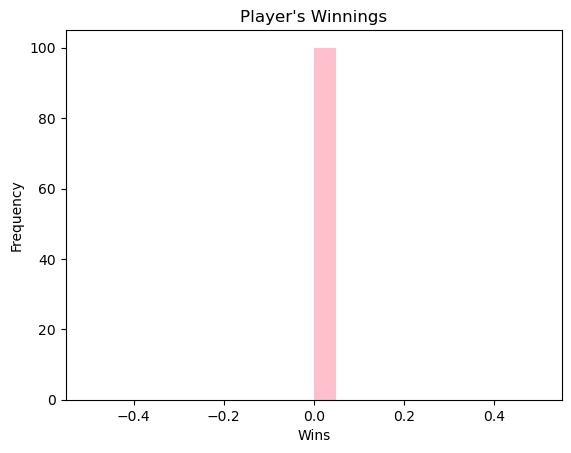

Average Winnings per Round: 0.0
Standard Deviation of Winnings: 0.0
Probability of Net Winning after playing 50 rounds: 0.0
Probability of Net Losing after playing 50 rounds: 0.0


In [39]:
import matplotlib.pyplot as plt
import numpy as np

game_results = []
for i in range(100):
    winnings = simulate_game()
    game_results.append(winnings)


## plotting winnings
plt.hist(game_results, bins=20, color='pink')
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.title("Player's Winnings")
plt.show()

# mean
avg_win = np.mean(game_results) / 50
print("Average Winnings per Round:", avg_win)

# stdev
std_win = np.std(game_results)
print("Standard Deviation of Winnings:", std_win)

# prob. of winning or losing after x rounds
prob_win = sum(1 for result in game_results if result > 0) / len(game_results)
prob_lost = sum(1 for result in game_results if result < 0) / len(game_results)
print("Probability of Net Winning after playing 50 rounds:", prob_win)
print("Probability of Net Losing after playing 50 rounds:", prob_lost)

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [42]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def card_value(self):
        if str(self.rank) in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif str(self.rank) in ('7', '8', '9'):
            return 0
        else:  # 10, J, Q, K
            return -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CardCounter(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        self.count = 0

    def decide(self):
        return "Hit" if self.count < self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and deck:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

In [44]:
def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CardCounter(threshold)
    other_players = [Player() for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    for i in range(50):
        if deck:
            simulate_round(players, deck)
        else:
            break

    return strategy_player.chips - 100


thres_vals = [-3, -2, -1, 0, 2]  # 1st Threshold values
average_winnings_per_rounds = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for i in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(average_winnings_per_rounds)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -3


In [46]:
thres_vals = [-4, -2, 0, 1, 2]  # 1st Threshold values
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(average_winnings_per_rounds)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -4


In [49]:
thres_vals = [-1, 0, 1, 2, 3]  # 1st Threshold values
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(average_winnings_per_rounds)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -1


In [51]:
thres_vals = [0, 1, 2, 3, 4, 5]
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)]
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(average_winnings_per_rounds)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: 0


In [53]:
thres_vals = [-5, -4, -3, -2, -1]
avg_win = []

for threshold in thres_vals:
    game_results = [simulate_game(threshold) for _ in range(100)]
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(average_winnings_per_rounds)
optimal_threshold = thres_vals[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [56]:
class Card:
    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank
    def card_value(self):


        return 1 if self.rank in '1357' else 0 if self.rank in '567' else -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips
    def bet(self):
        return 1
    def win(self, amount):


        self.chips += amount
    def lose(self, amount):
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
    def decide(self, hand_value):

        return "Stay" if hand_value >= 18 else "Hit"

class Dealer(Player):
    def decide(self):
        return "Stay" if sum(c.card_value() for c in self.hand) >= 17 else "Hit"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop() for _ in range(2)]
    dealer = players[0]
    dealer.hand.append(deck.pop())
    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide(sum(c.card_value() for c in player.hand)) == "Hit" and deck:
            player.hand.append(deck.pop())


    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())
    dealer_value = sum(c.card_value() for c in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(c.card_value() for c in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CountingPlayer(threshold)
    other_players = [Player() for _ in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(s, str(r)) for s in 'Hearts Diamonds Clubs Spades'.split() for r in range(1, 14)]
    random.shuffle(deck)
    for _ in range(50):
        if deck:
            simulate_round(players, deck)
        else:  # 10, J, Q, K
            break
    return strategy_player.chips - 100

In [58]:
thres_vals = [-5, -4, -3, -2, -1]
avg_win_new= [np.mean([simulate_game(i) for j in range(100)]) / 50 for i in thres_vals]
optimal_threshold = thres_vals[np.argmax(avg_win_new)]

print("Improved Method's optimal threshold val:", optimal_threshold)

Improved Method's optimal threshold val: -1


In [ ]:
## improvement in our result??